* 텍스트(던어의 시퀀스 또는 문차의 시퀀스), 시계열 또는 일반적인 시퀀스(sequence) 데이터를 처리할 수 있는 딥러닝 모델.
* 시퀀스 데이터를 처리하는 기본적인 딥러닝 모델은 **순환 신경망(recurrent neural network)**과 **1D 컨브넷(1D convnet)** 두 가지 방법.
    * 문셔 분류나 시계열 분류, 예를 들어 글의 주제나 책의 저자 식별하기
    * 시계열 비교, 예를 들어 두 문서나 두 주식 가격이 열마나 밀접하게 관련이 있는지 추정하기
    * 시퀀스-투0시ㅋㄴ스 학습, 예를 들어 영어 문장을 프랑스어로 변환하기
    * 감성 분석, 예를 들어 트윗이나 영화 리뷰가 긍정적인지 부정적인지 분류하기
    * 시계열 예측, 예를 들어 어떤 지역의 최근 날씨 데이터가 주어졀을 때 향후 날씨 예측하기

## 텍스트 데이터 다루기
* 텍스트는 가장 흔한 시퀀스 형태의 데이터이다.
* 텍스트를 수치형 텐서로 변환하는 과정을 **텍스트 벡터화(vectorizing text)**라고 한다.
    * 텍스트를 단어로 나누고 각 단어를 하나의 벡터로 변환한다.
    * 텍스트를 문자로 나누고 각 문자를 하나의 벡터로 변환한다.
    * 텍스트에서 단어나 문자의 **n-그램(n-gram)**을 추출하여 각 n-그램을 하나의 벡터로 변환한다. n-그램은 연속된 단어나 문자의 그룹으로 텍스트에서 단어나 문자를 하나씩 이동하면서 추출한다.
* 텍스트를 나누는 이런 단위(단어, 문자, n-그램)를 **토큰(token)**라고 한다.
* 텍스트를 토큰으로 나누는 작업을 **토큰화(tokenization)**라고 한다.
* 토큰과 벡터를 연결하는 방법은 여러 가지가 있다.
    * **원-핫 인코딩(one-hot encoding)**
    * **토큰 임베딩(token embedding)** (일반적으로 단어에 대해서만 사용되므로 **단어 임베딩(word embedding)이라고도 부른다.)

### 단어와 문자의 원-핫 인코딩

In [1]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [2]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [3]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('%s tokens' % len(word_index))

9 tokens


* 원-핫 인코딩의 변종 중 하나는 **원-핫 해싱(one-hot hashing)** 기법이다.
* 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용한다.
* 주요 정점은 명시적인 단어 인덱스가 필요 없기 때문에 메모리를 절약하고 온라인 방식으로 데이터를 인코딩할 수 있다.
* 한 가지 던점은 **해시 충돌(hash collision)**이다.

In [4]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### 단어 임베딩 사용하기
* 단어와 벡터를 연관 짓는 강력하고 인기 있는 또 다른 방법은 **단어 임베딩*이라는 밀집 **단어 벡터(word vector)**를 사용하는 것이다.
* 단어 임베딩을 만드는 방법은 두 가지이다.
    * (문서 분류나 감성 예측 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습한다. 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습한다.
    * 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드한다. 이를 **사전 훈련된 단어 임베딩(pretrained word embedding)**라고 한다.

#### Embedding 층을 사용하여 단어 임베딩 학습하기
* 단어 벡터 사이에 종 더 추상적이고 기하학적인 관계를 얻으려면 단어 사이에 있는 의미 관계를 반영해야 한다.
* 단어 임베딩은 언으를 기하학적 공간에 매핑하는 것이다.
* 일반적으로 두 단어 벡터 사이의 거리(L2 거리)는 이 단어 사이의 의미 거리와 관계되어 있다.(멀리 떨이진 위치에 임케딩된 단어 의미는 서로 다른 반면에 비슷한 단어를은 가까이 임베딩된다.)
* 실제 단어 임페딩 공간에서 의미 있는 기하학적 변환의 일반적인 예는 '성별' 벡터와 '복수(plural)' 벡터이다.

In [5]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

* Embedding 층을 (특정 단어를 나타내는) 점수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해하는 것이 가장 좋다.
* Embedding 층은 크기가 (samples, sequence_length)인 2D 정수 텐서를 입력으로 받는다.
* Embedding 층은 크기가 (samples, sequence_length, embedding_dimensionality)인 3D 실수형 텐서를 반환한다.
* Embedding 층의 객체를 생성할 때 가중치(토큰 벡터를 위한 내부 딕셔너리)는 다른 층과 마찬가지로 랜덤하게 초기화된다.
* 훈련하면서 이 단어 벡터는 역전파를 통해 점차 조정되어 이어지는 모델이 사용할 수 있도록 임베딩 공간을 구성한다.

In [8]:
from keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

(25000,) (25000,) (25000,) (25000,)


In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 3s 2ms/step - loss: 0.6671 - acc: 0.6244 - val_loss: 0.6142 - val_acc: 0.6982
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5388 - acc: 0.7521 - val_loss: 0.5258 - val_acc: 0.7282
Epoch 3/10
625/625 [==============================] 

#### 사전 훈련된 단어 임베딩 사용하기
* 자연어 처리에서 사전 훈련된 단어 임베딩을 사용하는 이유는 이미지 분류 문제에서 사전 훈련된 컨브넷을 사용하는 이유와 거의 동일하다.
* **Word2vec** 알고리즘은 가장 유명하고 성공적인 단어 임베딩 방법이다.
* Word2vec의 차원은 성별처럼 구체적인 의미아 있는 속성을 잡아낸다.

### 모든 내용을 적용하기: 원본 텍스트에서 단어 임베딩까지

#### 원본 IMDB 텍스트 내려받기
* http://mng.bz/0tIo

In [14]:
import os

imdb_dir = os.path.join(os.environ['DEV_PATH'], 'datasets/aclImdb')
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

#### 데이터 토큰화
* 사전 훈련된 단어 임베딩은 훈련 데이터가 부족한 문제에 특히 유용하다.
* 그렇지 않으면 문제에 특화된 임베딩이 훨씬 성능이 좋다.

In [15]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s tokens' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('data tensor shape:', data.shape)
print('label tensor shape:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582 tokens
data tensor shape: (25000, 100)
label tensor shape: (25000,)


#### GloVe 단어 임베딩 내려받기
* https://nlp.stanford.edu/projects/glove
* glove.6B.zip

#### 임베딩 전처리

In [17]:
glove_dir = os.path.join(os.environ['DEV_PATH'], 'datasets/glove.6B')

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s word vectors.' % len(embeddings_index))

400000 word vectors.


In [18]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

#### 모델 정의하기

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### 모델이 GloVe 임베딩 로드하기
* Embedding 층은 하나의 가중치 행렬을 가진다.
* 이 행렬은 2D 부동 소수 행렬이고 각 i변째 원소는 i번째 인덱스에 상응하는 단어 벡터이다.

In [20]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

#### 모델 훈련과 평가

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 83ms/step - loss: 1.3870 - acc: 0.5200 - val_loss: 1.1015 - val_acc: 0.4999
Epoch 2/10
7/7 [==============================] - 0s 60ms/step - loss: 0.6760 - acc: 0.7000 - val_loss: 0.6857 - val_acc: 0.5519
Epoch 3/10
7/7 [==============================] - 0s 61ms/step - loss: 0.4064 - acc: 0.8750 - val_loss: 0.8616 - val_acc: 0.5130
Epoch 4/10
7/7 [==============================] - 0s 58ms/step - loss: 0.2961 - acc: 0.9150 - val_loss: 0.8849 - val_acc: 0.5152
Epoch 5/10
7/7 [==============================] - 0s 58ms/step - loss: 0.2916 - acc: 0.8600 - val_loss: 0.6882 - val_acc: 0.5805
Epoch 6/10
7/7 [==============================] - 0s 59ms/step - loss: 0.2795 - acc: 0.8900 - val_loss: 0.7632 - val_acc: 0.5410
Epoch 7/10
7/7 [==============================] - 0s 58ms/step - loss: 0.1128 - acc: 0.9900 - val_loss: 0.7015 - val_acc: 0.5913
Epoch 8/10
7/7 [==============================] - 0s 59ms/step - loss: 0.0708 - acc: 0.9950 - val

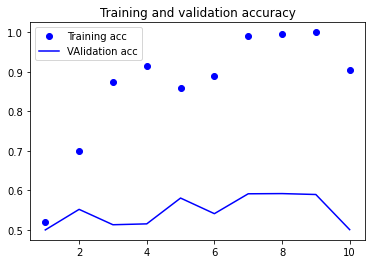

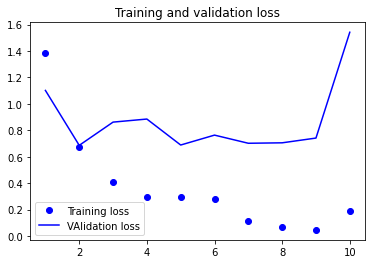

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='VAlidation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='VAlidation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 80ms/step - loss: 0.6955 - acc: 0.4500 - val_loss: 0.6921 - val_acc: 0.5174
Epoch 2/10
7/7 [==============================]

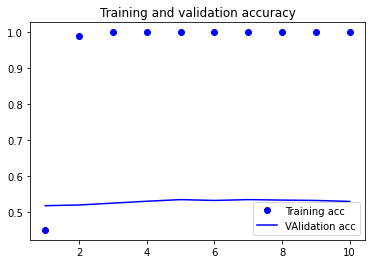

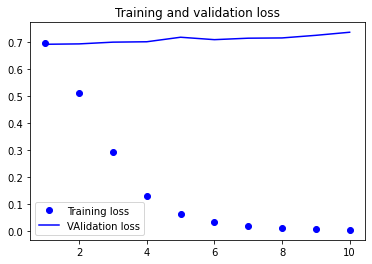

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='VAlidation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='VAlidation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [26]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 1.5405 - acc: 0.5004


[1.5404646396636963, 0.5004400014877319]

### 정리
* 원본 텍스트를 신경망이 처리할 수 있는 형태로 변환한다.
* 케라스 모델에 Embedding 층을 추가하여 어떤 작업에 특화된 토큰 임베딩을 학습한다.
* 데이터가 부족한 자연어 처리 문제에서 사전 훈련된 단어 임베딩을 사용하여 성능 향상을 꾀한다.